In [5]:
import pandas as pd
import numpy as np
import seaborn as sns   
#import matplotlib.pyplot as plt
import matplotlib.pylab as plt
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

# Stats tools
from scipy import stats
from scipy.special import boxcox1p 

#To the annoying warnings XD
import warnings
warnings.filterwarnings('ignore')


# #More Basic ML models
# import sklearn.linear_model as linear_model
# from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.svm import SVR

# from sklearn.metrics import mean_squared_error

# #Complexity ML models
# import xgboost as xgb
# import lightgbm as lightgbm

In [6]:
df = pd.read_csv('train.csv')

In [7]:
# The dimensions
print('The dimensions of the data is: ', df.shape)
print('Columns name: ', df.columns)

The dimensions of the data is:  (1460, 81)
Columns name:  Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'G

In [8]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [9]:
pd.DataFrame({'Type' : df.dtypes}).value_counts('Type')

Type
object     43
int64      35
float64     3
dtype: int64

In [10]:
numeric_feat = pd.DataFrame(df.dtypes[df.dtypes != 'object']).drop('Id').index
print(numeric_feat)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [11]:
pd.DataFrame({
    'Min':df[numeric_feat].min(),
    '1° Quantile':df[numeric_feat].quantile(0.25),
    'Median':df[numeric_feat].median(),
    'Mean':df[numeric_feat].mean(),
    '3° Quantile':df[numeric_feat].quantile(0.75),
    'Max':df[numeric_feat].max(),
    'Sd':df[numeric_feat].std(),
    'Count':df[numeric_feat].count()
    })

,Min,1° Quantile,Median,Mean,3° Quantile,Max,Sd,Count
MSSubClass,20.0,20.00,50.0,56.897260,70.00,190.0,42.300571,1460
LotFrontage,21.0,59.00,69.0,70.049958,80.00,313.0,24.284752,1201
LotArea,1300.0,7553.50,9478.5,10516.828082,11601.50,215245.0,9981.264932,1460
OverallQual,1.0,5.00,6.0,6.099315,7.00,10.0,1.382997,1460
OverallCond,1.0,5.00,5.0,5.575342,6.00,9.0,1.112799,1460
YearBuilt,1872.0,1954.00,1973.0,1971.267808,2000.00,2010.0,30.202904,1460
YearRemodAdd,1950.0,1967.00,1994.0,1984.865753,2004.00,2010.0,20.645407,1460
MasVnrArea,0.0,0.00,0.0,103.685262,166.00,1600.0,181.066207,1452
BsmtFinSF1,0.0,0.00,383.5,443.639726,712.25,5644.0,456.098091,1460
BsmtFinSF2,0.0,0.00,0.0,46.549315,0.00,1474.0,161.319273,1460


In [12]:
df[numeric_feat].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
df.groupby('KitchenQual')[numeric_feat].mean()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
KitchenQual,,,,,,,,,,,,,,,,,,,,,
Ex,51.800000,85.170213,13224.570000,8.270000,5.380000,1994.030000,2002.970000,277.121212,850.610000,27.330000,...,144.180000,87.010000,12.650000,4.840000,29.830000,10.350000,0.000000,6.530000,2007.880000,328554.670000
Fa,61.153846,70.142857,8487.461538,4.487179,5.205128,1931.564103,1959.230769,15.230769,136.512821,19.769231,...,30.410256,22.307692,38.666667,0.000000,3.589744,0.000000,112.923077,6.051282,2007.871795,105565.205128
Gd,58.054608,71.692144,10577.037543,6.790102,5.568259,1987.319113,1998.315700,124.513793,456.469283,39.305461,...,118.749147,59.655290,15.549488,3.776451,12.093857,4.124573,18.600683,6.464164,2007.802048,212116.023891
TA,56.442177,66.392679,10208.104762,5.338776,5.627211,1957.480272,1973.039456,68.534060,394.337415,56.360544,...,71.300680,32.102041,27.439456,3.103401,16.025850,0.783673,65.564626,6.194558,2007.814966,139962.511565


In [14]:
df.groupby('KitchenQual')[numeric_feat].std()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
KitchenQual,,,,,,,,,,,,,,,,,,,,,
Ex,35.208757,35.210470,8125.240813,1.339795,1.002824,26.482872,9.340317,276.160456,799.383322,137.130776,...,125.843287,80.102648,53.075775,35.172510,76.878108,73.009806,0.000000,2.948908,1.312566,120862.942573
Fa,53.722748,23.117529,2783.288228,1.430344,1.749880,18.044966,16.884221,55.758153,209.116547,99.897174,...,80.409713,47.889211,66.118050,0.000000,17.089113,0.000000,564.710051,2.901440,1.360717,36004.254037
Gd,39.808994,25.398206,9523.045101,1.045285,1.060374,26.025081,11.926455,188.176592,455.209109,161.641845,...,124.547085,60.954577,56.944553,26.529317,52.189363,50.401531,167.062364,2.696547,1.335279,64020.176702
TA,44.399126,20.010303,10729.827313,0.918063,1.120685,24.730192,18.528344,143.217084,360.214590,166.207265,...,121.780202,64.653903,64.382299,31.298295,56.141711,21.246080,670.080459,2.661456,1.325106,38896.280336


In [15]:
#Rename the columns
df_test = df.rename(columns = {
    'SalePrice': 'SalePrice2',
    'Electrical':'Electrical2'
    })



In [16]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice2
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
# Checking the missing values
def missing_values(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) !=0]
    percent = round(df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) !=0]/len(df),3)

    return pd.DataFrame({
        'Total': df.shape[0],
        'Total missing':total, 
        'Percent missing': percent})
    

In [18]:
missing_values(df = df)

,Total,Total missing,Percent missing
PoolQC,1460,1453,0.995
MiscFeature,1460,1406,0.963
Alley,1460,1369,0.938
Fence,1460,1179,0.808
FireplaceQu,1460,690,0.473
LotFrontage,1460,259,0.177
GarageYrBlt,1460,81,0.055
GarageCond,1460,81,0.055
GarageType,1460,81,0.055
GarageFinish,1460,81,0.055


In [19]:
# Finding the non duplicated values of 'MSZoning' and 'Utilities'.
df = df.loc[~df.duplicated(subset=['Id'], keep = 'last')] \
        .sort_values('YrSold') \
        .reset_index(drop=True)

In [20]:
df.shape


(1460, 81)

In [21]:
#Querying command
df.query('MSZoning == "RL"').value_counts('LandContour')

LandContour
Lvl    1033
Bnk      42
HLS      42
Low      34
dtype: int64

In [22]:
#OR USING THIS
df[df['SalePrice'] >= df['SalePrice'].quantile(0.75)].value_counts('LandContour')

LandContour
Lvl    318
HLS     26
Low     17
Bnk      6
dtype: int64

In [23]:
remove_columns = missing_values(df = df)[missing_values(df = df)['Percent missing']> 0.5].index
print(remove_columns)

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], dtype='object')


In [24]:
df = df.drop(remove_columns, axis = 1)

In [25]:
def plotting_3_chart(df, feature):

    feature = 'SalePrice'
    fig = plt.figure(constrained_layout = True, figsize = (15, 10))
    grid = plt.GridSpec(ncols = 3, nrows = 3, figure = fig)

    # First plot
    ax1 = fig.add_subplot(grid[0, 0:2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature], kde = True, ax = ax1)

    # Second Plot
    ax2 = fig.add_subplot(grid[1, 0:2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:, feature], plot = ax2)

    # Third Plot
    ax3 = fig.add_subplot(grid[0:2,2])
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3)



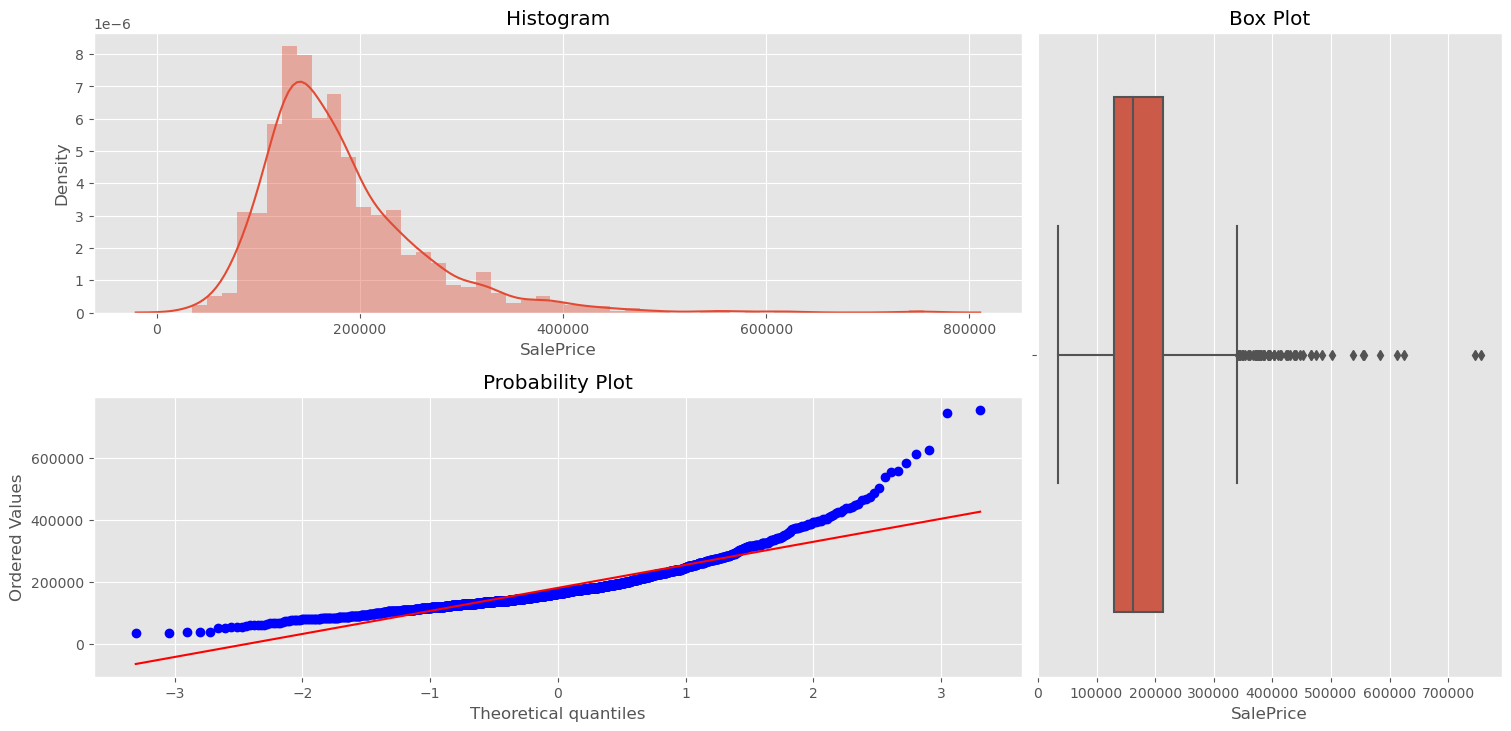

In [26]:
plotting_3_chart(df, 'SalePrice')

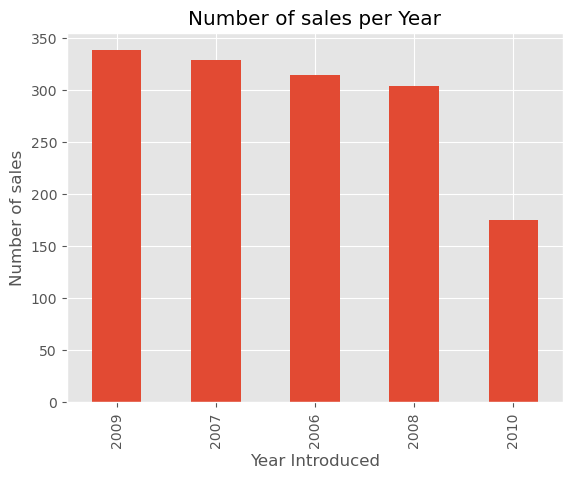

In [27]:
ax = df.value_counts('YrSold')\
        .plot(kind = 'bar',  title = 'Number of sales per Year')

ax.set_xlabel('Year Introduced')
ax.set_ylabel('Number of sales')
plt.show()

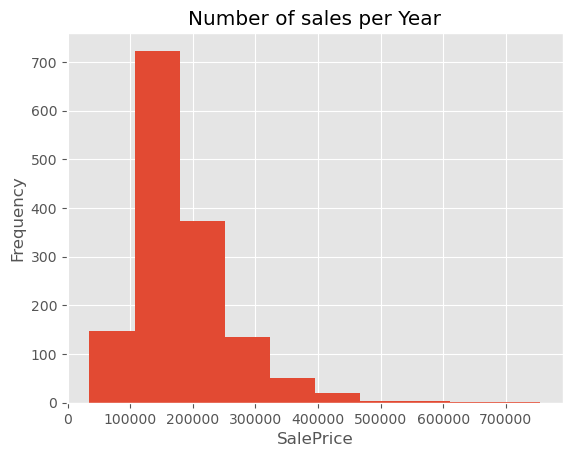

In [28]:
ax = df['SalePrice'] \
        .plot(kind = 'hist',  title = 'Number of sales per Year')

ax.set_xlabel('SalePrice')
ax.set_ylabel('Frequency')
plt.show()

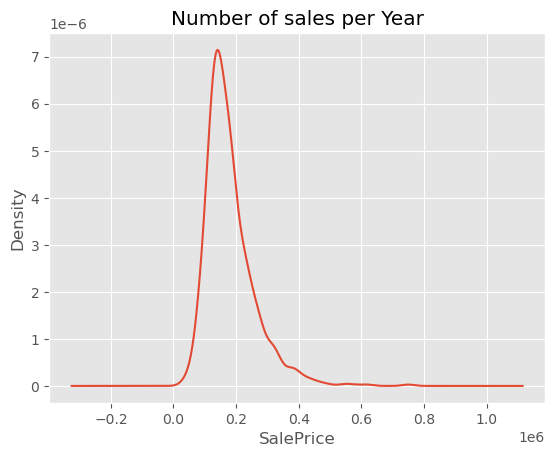

In [29]:
ax = df['SalePrice'] \
        .plot(kind = 'kde',  title = 'Number of sales per Year')

ax.set_xlabel('SalePrice')
ax.set_ylabel('Density')
plt.show()

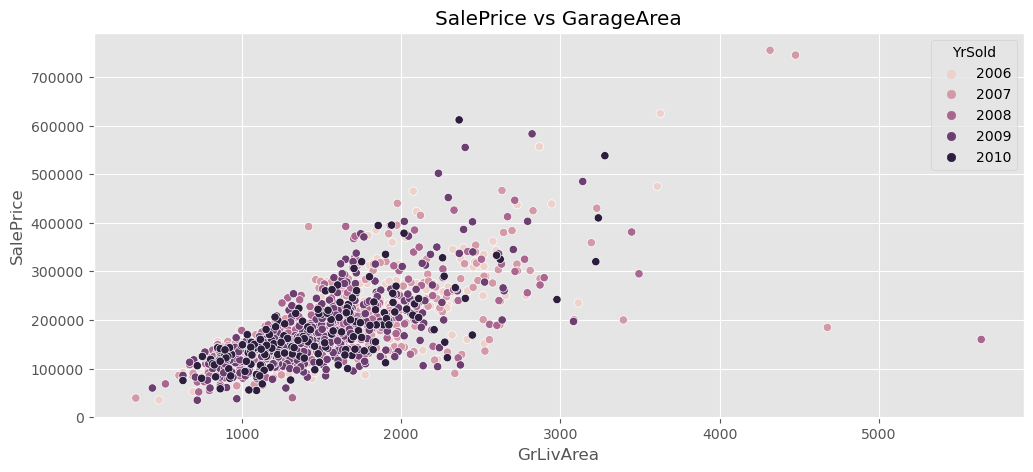

In [30]:
# SalePrice vs GarageArea
plt.figure(figsize = (12,5))
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', hue = 'YrSold',data = df)
plt.title('SalePrice vs GarageArea')
plt.show()

<Figure size 1500x1000 with 0 Axes>

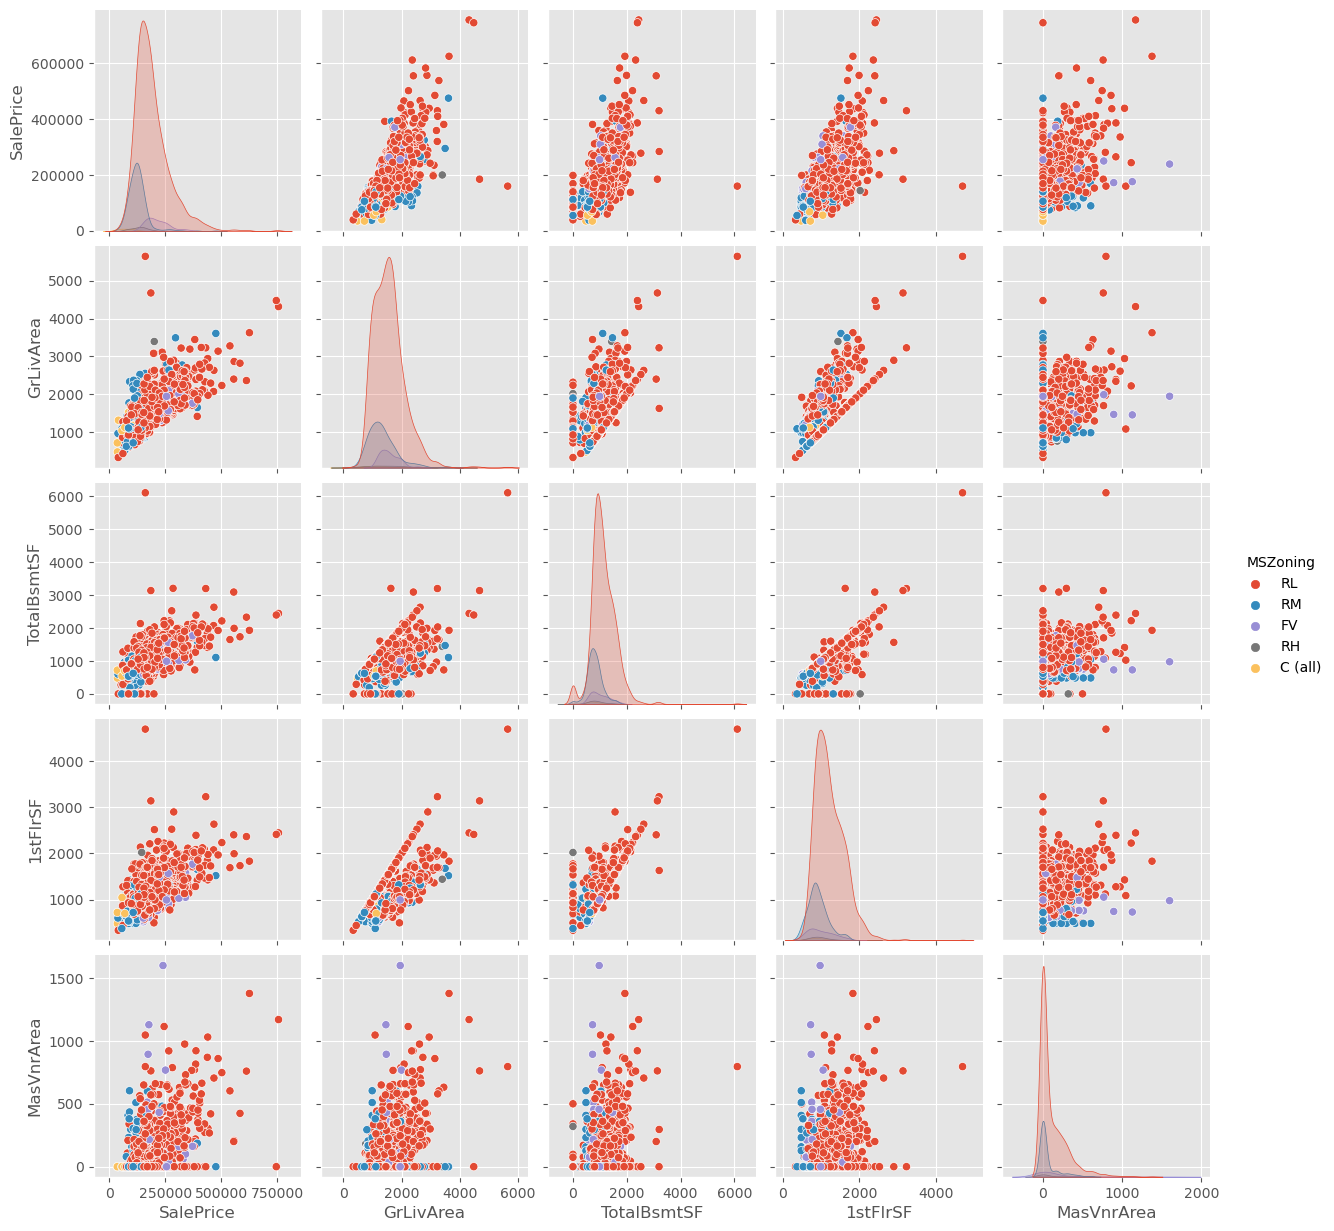

In [31]:
features = ['SalePrice','GrLivArea', 'TotalBsmtSF' ,'1stFlrSF', 'MasVnrArea', 'MSZoning', 'KitchenQual']
dist_data = df[features]
plt.figure(figsize= (15,10))
sns.pairplot(data = dist_data, hue = 'MSZoning')
plt.show()

In [32]:
df_corr = df[features].dropna().corr()
df_corr

,SalePrice,GrLivArea,TotalBsmtSF,1stFlrSF,MasVnrArea
SalePrice,1.000000,0.710080,0.612971,0.606849,0.477493
GrLivArea,0.710080,1.000000,0.453840,0.565833,0.390857
TotalBsmtSF,0.612971,0.453840,1.000000,0.818246,0.363936
1stFlrSF,0.606849,0.565833,0.818246,1.000000,0.344501
MasVnrArea,0.477493,0.390857,0.363936,0.344501,1.000000


<AxesSubplot:>

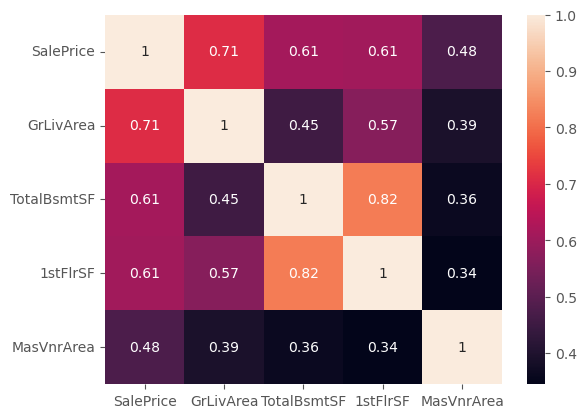

In [33]:
sns.heatmap(df_corr, annot= True)

In [34]:
df.query('LandContour == "Lvl"') \
    .groupby('MSZoning')['SalePrice']\
    .agg(['mean', 'median', 'std', 'count']) 

,mean,median,std,count
MSZoning,,,,
C (all),66251.833333,54200.0,38889.109532,6
FV,214014.061538,205950.0,52369.662067,65
RH,124650.000000,126450.0,33446.051087,10
RL,189811.296225,173000.0,79975.265137,1033
RM,124826.893401,120500.0,44529.214178,197


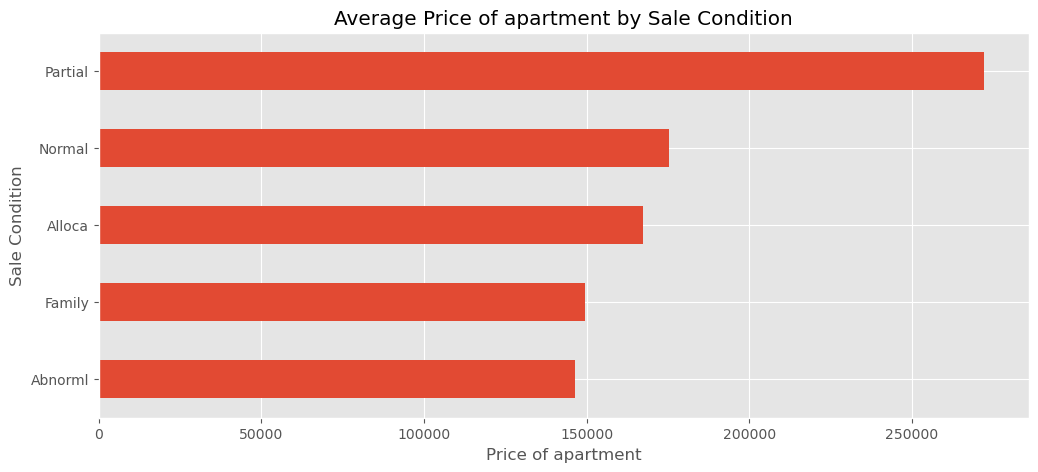

In [35]:
ax = df.groupby('SaleCondition')['SalePrice']\
        .agg(['mean', 'median', 'std', 'count']) \
        .query('count > 10') \
        .sort_values('mean')['mean'] \
        .plot(kind = 'barh', figsize = (12,5), title = 'Average Price of apartment by Sale Condition')

ax.set_xlabel('Price of apartment')
ax.set_ylabel('Sale Condition')
plt.show()

In [36]:
skewed_feats  = df[numeric_feat].apply(lambda x: stats.skew(x)).sort_values(ascending=False)
print(skewed_feats)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
LotFrontage            NaN
MasVnrArea             NaN
GarageYrBlt            NaN
d

In [37]:
def fixing_skewness(data):
        """
        This function takes in a dataframe and return fixed skewed dataframe
        """
        ## Import necessary modules 
        from scipy.stats import skew
        from scipy.special import boxcox1p
        from scipy.stats import boxcox_normmax

        ## Getting all the data that are not of "object" type. 
        numeric_feats = data.dtypes[data.dtypes != "object"].index

        # Check the skew of all numerical features
        skewed_feats = data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
        high_skew = skewed_feats[abs(skewed_feats) > 0.5].index

        for feat in high_skew:
            data[feat] = boxcox1p(data[feat], boxcox_normmax(data[feat] + 1))

In [38]:
df_old = df.copy()

fixing_skewness(data = df)

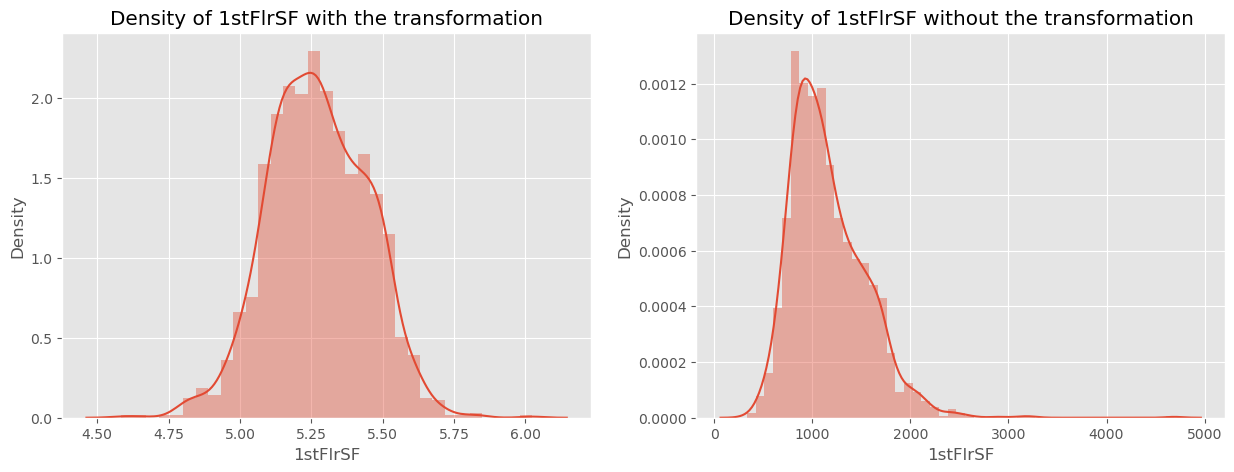

In [39]:
# Make the comparassing
fig = plt.figure(constrained_layout = True, figsize = (15,5))
grid = plt.GridSpec(ncols = 2, nrows = 1)

ax1 = fig.add_subplot(grid[0,0])
ax1.set_title('Density of 1stFlrSF with the transformation')
sns.distplot(df['1stFlrSF'], ax=ax1)

ax2 = fig.add_subplot(grid[0,1])
ax2.set_title('Density of 1stFlrSF without the transformation')
sns.distplot(df_old['1stFlrSF'], ax=ax2)

plt.show()


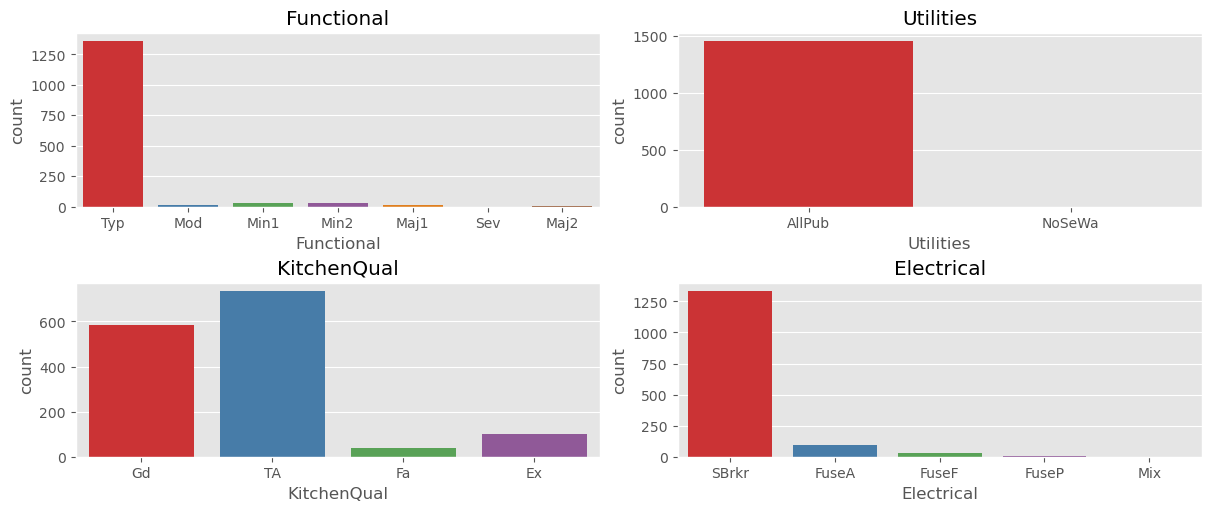

In [40]:
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style

style.use('ggplot')
    
fig = plt.figure(constrained_layout = True, figsize = (12,5))
#Making the grid using the GridSpec function
grid = gridspec.GridSpec(ncols = 2, nrows = 2, figure = fig)
    
#First Countplot
ax1 = fig.add_subplot(grid[0,0])
ax1.set_title('Functional')
sns.countplot(df['Functional'], ax=ax1, palette='Set1')
    
#Second Countplot
ax2 = fig.add_subplot(grid[0,1])
ax2.set_title('Utilities')
sns.countplot(df['Utilities'], ax=ax2, palette='Set1')
    
#Third Countplot
ax3 = fig.add_subplot(grid[1,0])
ax3.set_title('KitchenQual')
sns.countplot(df['KitchenQual'], ax=ax3, palette='Set1')

#Fourth Countplot
ax4 = fig.add_subplot(grid[1,1])
ax4.set_title('Electrical')
sns.countplot(df['Electrical'], ax=ax4, palette='Set1')

plt.show()

In [41]:
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])
df['Utilities'] = df['Utilities'].fillna(df['Electrical'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['Electrical'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [42]:
#Imputing Missing values
#These features are non continous variable, we used "none" to replace the null values. 
missing_val_col = ["FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    df[i] = df[i].fillna('None')

In [43]:
## These features are continous variable, we used "0" to replace the null values. 
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    df[i] = df[i].fillna(0)

In [44]:
## Replaced all missing values in LotFrontage by imputing the median value of each neighborhood. 
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.median()))

#Changing the type of the some variables
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str) 
df['MSZoning'] = df['MSZoning'].astype(str)


#Adding values to the missing values present to this features 
df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0]) 
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

In [45]:
# Working with the rest variables
missing_values(df)

,Total,Total missing,Percent missing


In [46]:
#More Basic ML models
import sklearn.linear_model as linear_model
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

#Complexity ML models
import xgboost as xgb
import lightgbm as lightgbm

In [47]:
y = df['SalePrice'].reset_index(drop=True)
X = df

In [48]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})

df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                     'value': [5, 6, 7, 8]})

df1.merge(df2, left_on='lkey', right_on='rkey')


,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [56]:
df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]})
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})
print(df1)
print('\n')
print(df2)

     a  b
0  foo  1
1  bar  2


     a  c
0  foo  3
1  baz  4


In [52]:
#Inner
df1.merge(df2, how='inner', on='a')

,a,b,c
0,foo,1,3


In [53]:
#Left
df1.merge(df2, how='left', on='a')

,a,b,c
0,foo,1,3.0
1,bar,2,NaN


In [402]:
#Fitting model(simple approach)

from sklearn.model_selection import train_test_split
## Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning. 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)


X_train.shape, y_train.shape, X_test.shape, y_test.shape

((978, 77), (978,), (482, 77), (482,))

In [403]:
## importing necessary models.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Call in the LinearRegression object
lin_reg = LinearRegression(normalize=True, n_jobs=-1)
## fit train and test data. 
lin_reg.fit(X_train, y_train)
## Predict test data. 
y_pred = lin_reg.predict(X_test)


print ('%.2f'%mean_squared_error(y_test, y_pred))

ValueError: could not convert string to float: 'RL'

In [ ]:
df_lm_pred = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred}).set_index(np.arange(0,len(y_test)), len(y_test))

plt.figure(figsize  = (12,5))
sns.scatterplot(x = 'y_test', y = 'y_pred', data = df_lm_pred)
plt.title("Linear Regression Model")
plt.show()

In [392]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,782,6.281282698901947,RL,65.0,8.517228,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,7,2006,WD,Normal,8.846541
1,1220,8.646522024099514,RM,21.0,7.175188,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,4,2006,WD,Abnorml,8.502199
2,282,4.14668703146344,FV,60.0,8.523255,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,5,2006,New,Partial,8.872610
3,570,7.202598230652628,RL,73.0,8.501527,Pave,IR1,Lvl,AllPub,Corner,...,0.0,0.0,0.0,0.0,0.0,12,2006,WD,Normal,8.712310
4,1221,4.14668703146344,RL,66.0,8.596883,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,11,2006,WD,Abnorml,8.624033
